In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif 
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

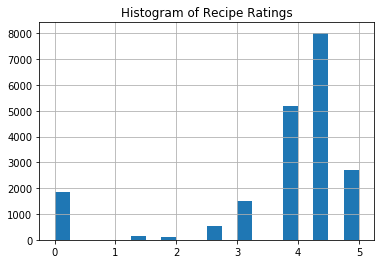

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

## Challenge Attempt

In [6]:
total_missing = raw_data.isnull().sum().sort_values(ascending=False) 
                    #find the total null data values in each column based on percentage of data points in each column 

percent_missing = (raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

missing_data.head(4)

,Total,Percent
fat,4183,0.208608
protein,4162,0.207560
sodium,4119,0.205416
calories,4117,0.205316


In [7]:
fill_list = ['fat','protein','sodium','calories'] 
                                    #use the interpolation method to fill the missing data in the numeric data columns

for col in fill_list:
    raw_data.loc[:, col].interpolate(inplace=True) 

- fill missing data by interpolation

In [8]:
data_float = raw_data.select_dtypes(include=['float64']) 

In [43]:
from scipy import stats
data_float[(np.abs(stats.zscore(data_float)) < 3).all(axis=1)].head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
1449,0.00,319.666667,11.333333,11.666667,299.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1544,0.00,477.000000,8.000000,25.000000,245.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545,0.00,2.000000,0.000000,0.000000,2377.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585,3.75,336.333333,33.666667,17.666667,506.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1666,3.75,286.000000,17.000000,7.500000,689.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- clean up outliers greater than 3 std deviations from the mean 

In [59]:
X = data_float.drop('rating', axis=1).astype(int)  
y = data_float.rating.apply(lambda x: 1 if x > 2.5 else 0).astype(int) 

- create binary target data 

In [60]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [61]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

- scale input data

In [62]:
#Pipeline Construction.
anova = SelectKBest(f_classif, k=30)
svm = SVC(kernel='linear')
anova_svm = make_pipeline(anova, svm)

In [68]:
#Fitting & Cross-Validation.
anova_svm.fit(X_train_std,y_train)
scores = cross_val_score(anova_svm, X_train_std, y_train, cv=20)

In [69]:
#De-Masking Selected Features.
features = anova.get_support(indices=True)
feature_names = list(X_train.columns)
selected_features = []
for feature in features:
    selected_features.append(feature_names[feature])

In [70]:
#Printing Outcomes.
print('Cross-Validation Scores: {}\n'.format(scores))
print('Cross-Validation Score Averaged Across Folds: {:.2%}.\n'.format(scores.mean()))
print('Selected Features: {}\n'.format(selected_features))

Cross-Validation Scores: [0.87671233 0.88418431 0.87173101 0.86674969 0.88044832 0.86799502
 0.87671233 0.87173101 0.87422167 0.8765586  0.86783042 0.88029925
 0.8639201  0.87640449 0.87890137 0.87390762 0.87890137 0.85892634
 0.88264669 0.86516854]

Cross-Validation Score Averaged Across Folds: 87.37%.

Selected Features: ['alcoholic', 'bake', 'bitters', 'bon appétit', 'brandy', 'cocktail', 'cocktail party', 'condiment', 'créme de cacao', 'drink', 'fall', 'fortified wine', 'fruit juice', 'gin', 'gourmet', 'harpercollins', 'house & garden', 'liqueur', 'non-alcoholic', 'onion', 'peanut free', 'quick & easy', 'roast', 'rum', 'sauté', 'soy free', 'spirit', 'tree nut free', 'weelicious', 'winter']



In [71]:
from sklearn.metrics import accuracy_score

predicted = anova_svm.predict(X_test)
print (accuracy_score(y_test, predicted))

0.8743455497382199


In [72]:
anova_svm.score(X_train_std, y_train)

0.8740103484820149

### Converting the target variable into a binary class decreases variance in the data and increases accuracy of the SVM classifier.